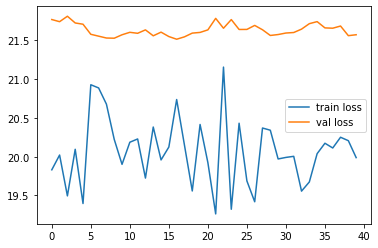

In [7]:
import torch
import matplotlib.pyplot as plt 

def to_list(loss_objects, smooth=False, a=0.5):
    if smooth:
        old = loss_objects[0]['avg_loss']
        ll = [old]

        for e in loss_objects[1:]:
            l = e['avg_loss']
            old = a * l + (1 - a) * old
            ll.append(old)
        
        return ll
    return [e['avg_loss'] for e in loss_objects]

status_quo = torch.load('./train/snapshot-0.pt')
offset = 300
# plt.plot(to_list(status_quo['train_loss'])[:])
# plt.ylim(0, 200)
plt.plot(to_list(status_quo['train_loss'][offset:]))
plt.plot(to_list(status_quo['val_loss'][offset:]))

plt.legend(('train loss', 'val loss'))
plt.show()